['ORPO_result1/checkpoint-200']
[{'epoch': 0.006420545746388443, 'grad_norm': 0.5468225479125977, 'learning_rate': 3.2e-07, 'log_odds_chosen': 0.12006641179323196, 'log_odds_ratio': -0.7560616731643677, 'logits/chosen': -4.168983459472656, 'logits/rejected': -4.166810512542725, 'logps/chosen': -0.7882572412490845, 'logps/rejected': -0.8718658089637756, 'loss': 2.5899, 'nll_loss': 2.2118234634399414, 'rewards/accuracies': 0.5546875, 'rewards/chosen': -0.39412862062454224, 'rewards/margins': 0.041804276406764984, 'rewards/rejected': -0.4359329044818878, 'step': 4}, {'epoch': 0.012841091492776886, 'grad_norm': 0.46052587032318115, 'learning_rate': 6.4e-07, 'log_odds_chosen': 0.06399141997098923, 'log_odds_ratio': -0.7879557013511658, 'logits/chosen': -4.192505836486816, 'logits/rejected': -4.189008712768555, 'logps/chosen': -0.8124215602874756, 'logps/rejected': -0.8894473910331726, 'loss': 2.67, 'nll_loss': 2.2760043144226074, 'rewards/accuracies': 0.4921875, 'rewards/chosen': -0.4062107

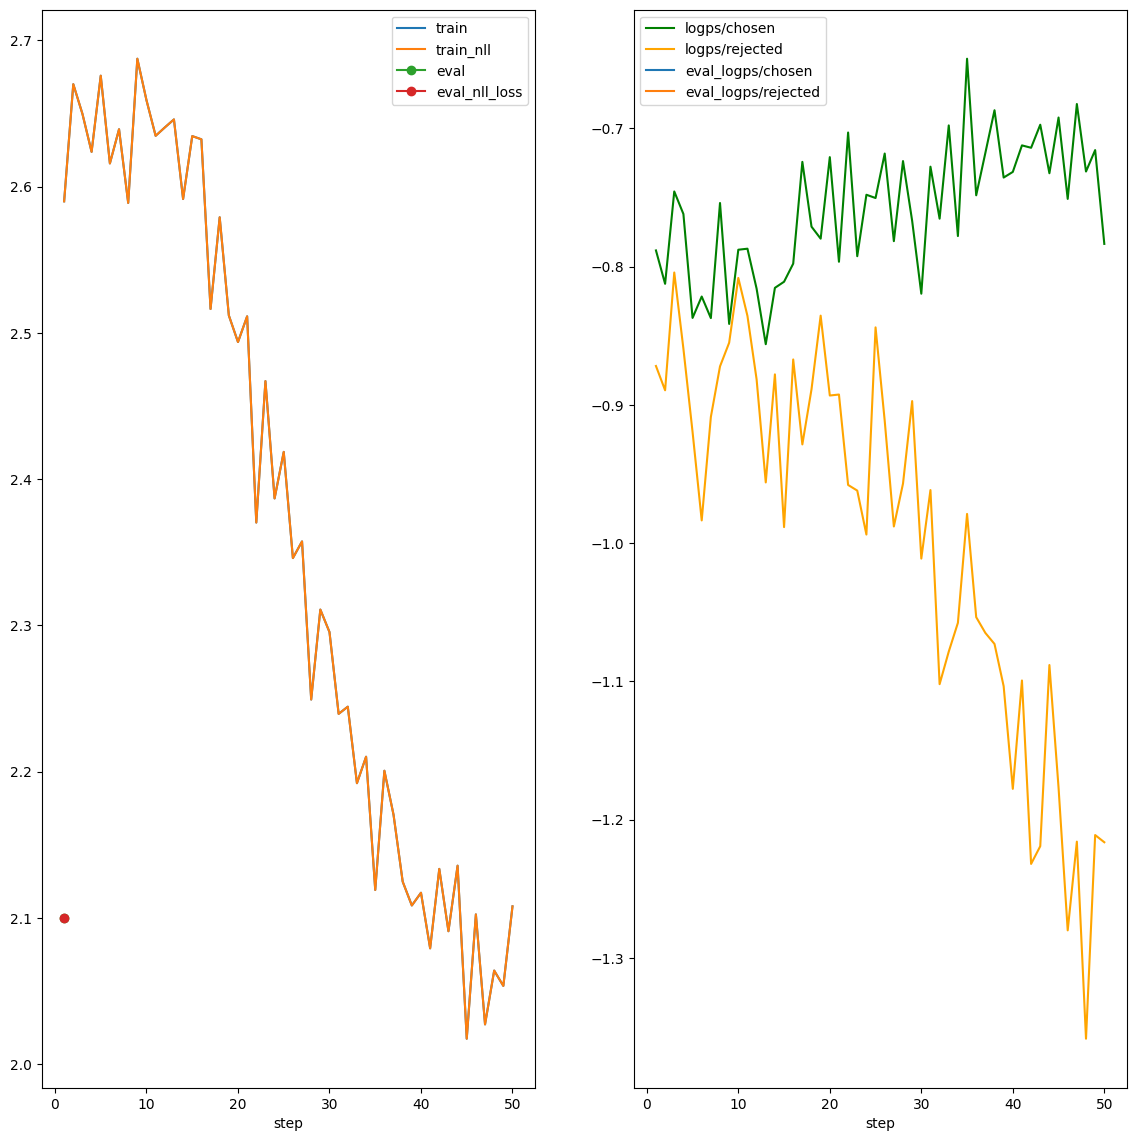

In [9]:
import os
import os.path as osp
from json import load
from matplotlib import pyplot as plt
from glob import glob

paths = glob('ORPO_result1/*')
print(paths)
plt.figure(figsize=(14,14))


with open('/workspace/minsung/ORPO_result1/checkpoint-200/trainer_state.json', 'r') as f:
    state = load(f)['log_history']
print(state)
loss = dict()
loss['train'] = list()
loss['eval'] = list()
loss['nll_loss'] = list()
loss['eval_nll_loss'] = list()

ps_margin = dict()
ps_margin['logps/chosen'] = list()
ps_margin['eval_logps/chosen'] = list()
ps_margin['logps/rejected'] = list()
ps_margin['eval_logps/rejected'] = list()

for each_state in state:
    for key, val in each_state.items():
        if key == 'loss': loss['train'].append(val)
        if key == 'eval_loss': loss['eval'].append(val)
        if key == 'nll_loss': loss['nll_loss'].append(val)
        if key == 'eval_nll_loss': loss['eval_nll_loss'].append(val)
        if key == 'logps/chosen': ps_margin['logps/chosen'].append(val)
        if key == 'eval_logps/chosen': ps_margin['eval_logps/chosen'].append(val)
        if key == 'logps/rejected': ps_margin['logps/rejected'].append(val)
        if key == 'eval_logps/rejected': ps_margin['eval_logps/rejected'].append(val)

plt.subplot(1,2,1)
plt.plot(list(range(1,len(loss['train'])+1)), loss['train'], label='train')
plt.plot(list(range(1,len(loss['nll_loss'])+1)), loss['train'], label='train_nll')
plt.plot(list(range(1,len(loss['eval'])*200+1, 200)), loss['eval'], marker='o', label='eval')
plt.plot(list(range(1,len(loss['eval_nll_loss'])*200+1, 200)), loss['eval'], marker='o', label='eval_nll_loss')
plt.legend()
plt.xlabel('step')

plt.subplot(1,2,2)
plt.plot(list(range(1,len(ps_margin['logps/chosen'])+1)), ps_margin['logps/chosen'], label='logps/chosen', color='green')
plt.plot(list(range(1,len(ps_margin['logps/rejected'])+1)), ps_margin['logps/rejected'], label='logps/rejected', color='orange')
plt.plot(list(range(1,len(ps_margin['eval_logps/chosen'])*200+1,200)), ps_margin['eval_logps/chosen'], label='eval_logps/chosen')
plt.plot(list(range(1,len(ps_margin['eval_logps/rejected'])*200+1,200)), ps_margin['eval_logps/rejected'], label='eval_logps/rejected')
plt.legend()    
plt.xlabel('step')

plt.savefig('log.png')

In [ ]:

plt.savefig(osp.join('figures', f'{path}.png'))
plt.clf()